In [1]:
import os
import tensorflow as tf
import import_ipynb

importing Jupyter notebook from data_preprocessing.ipynb
Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 7178 files belonging to 7 classes.
Using 1435 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
(32, 48, 48, 1)
(32,)
0.0 1.0


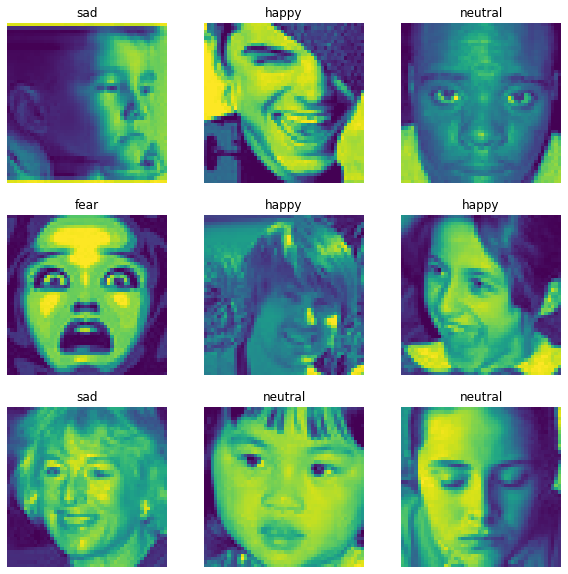

In [2]:
from datetime import datetime
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers, Sequential
from data_preprocessing import train_ds, test_ds
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard, EarlyStopping

In [3]:
num_classes = 7

In [4]:
model = Sequential([
    layers.experimental.preprocessing.Normalization(),
    
    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    
    layers.Dense(num_classes, activation="softmax")
])

In [5]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [6]:
model.compile(optimizer=sgd, loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [7]:
os.makedirs("models", exist_ok=True)
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [8]:
model.fit(train_ds, epochs=90,
          callbacks=[
             ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=10, verbose=1, mode="auto", min_lr=1e-05),
#              ModelCheckpoint("models/%s.h5" % (start_time), monitor="val_loss", save_best_only=True, mode="min", verbose=1),
             TensorBoard(log_dir="logs/%s" % (start_time)),
             EarlyStopping(monitor="val_loss", patience=3)
         ],
         use_multiprocessing=True,
         workers=5,
         max_queue_size=5)

model.summary()

Epoch 1/90
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
  1/718 [..............................] - ETA: 0s - loss: 1.9470 - accuracy: 0.1562WARNING:tensorflow:From c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.s

718/718 [==============================] - 6s 8ms/step - loss: 1.7045 - accuracy: 0.4549
Epoch 16/90
718/718 [==============================] - 7s 9ms/step - loss: 1.6947 - accuracy: 0.4645
Epoch 17/90
718/718 [==============================] - 6s 9ms/step - loss: 1.6896 - accuracy: 0.4697
Epoch 18/90
718/718 [==============================] - 6s 9ms/step - loss: 1.6748 - accuracy: 0.4852
Epoch 19/90
718/718 [==============================] - 6s 8ms/step - loss: 1.6635 - accuracy: 0.4953
Epoch 20/90
718/718 [==============================] - 6s 9ms/step - loss: 1.6531 - accuracy: 0.5074
Epoch 21/90
718/718 [==============================] - 6s 9ms/step - loss: 1.6432 - accuracy: 0.5172
Epoch 22/90
718/718 [==============================] - 6s 9ms/step - loss: 1.6324 - accuracy: 0.5292
Epoch 23/90
718/718 [==============================] - 6s 9ms/step - loss: 1.6240 - accuracy: 0.5383
Epoch 24/90
718/718 [==============================] - 6s 9ms/step - loss: 1.6131 - accuracy: 0.5498
Ep

718/718 [==============================] - 6s 9ms/step - loss: 1.5454 - accuracy: 0.6194
Epoch 34/90
718/718 [==============================] - 6s 9ms/step - loss: 1.5369 - accuracy: 0.6263
Epoch 35/90
718/718 [==============================] - 6s 9ms/step - loss: 1.5282 - accuracy: 0.6367
Epoch 36/90
718/718 [==============================] - 7s 9ms/step - loss: 1.5241 - accuracy: 0.6393
Epoch 37/90
718/718 [==============================] - 7s 9ms/step - loss: 1.5185 - accuracy: 0.6455
Epoch 38/90
718/718 [==============================] - 6s 9ms/step - loss: 1.5118 - accuracy: 0.6522
Epoch 39/90
718/718 [==============================] - 6s 9ms/step - loss: 1.5085 - accuracy: 0.6561
Epoch 40/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4977 - accuracy: 0.6672
Epoch 41/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4945 - accuracy: 0.6696
Epoch 42/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4876 - accuracy: 0.6778
Ep

718/718 [==============================] - 6s 9ms/step - loss: 1.4480 - accuracy: 0.7163
Epoch 52/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4455 - accuracy: 0.7205
Epoch 53/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4371 - accuracy: 0.7287
Epoch 54/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4331 - accuracy: 0.7323
Epoch 55/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4283 - accuracy: 0.7361
Epoch 56/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4260 - accuracy: 0.7392
Epoch 57/90
718/718 [==============================] - 6s 8ms/step - loss: 1.4238 - accuracy: 0.7423
Epoch 58/90
718/718 [==============================] - 6s 9ms/step - loss: 1.4219 - accuracy: 0.7428
Epoch 59/90
718/718 [==============================] - 7s 9ms/step - loss: 1.4195 - accuracy: 0.7451
Epoch 60/90
718/718 [==============================] - 7s 9ms/step - loss: 1.4127 - accuracy: 0.7520
Ep

718/718 [==============================] - 6s 9ms/step - loss: 1.3925 - accuracy: 0.7734
Epoch 69/90
718/718 [==============================] - 6s 9ms/step - loss: 1.3908 - accuracy: 0.7746
Epoch 70/90
718/718 [==============================] - 7s 9ms/step - loss: 1.3933 - accuracy: 0.7711
Epoch 71/90
718/718 [==============================] - 7s 9ms/step - loss: 1.3884 - accuracy: 0.7768
Epoch 72/90
718/718 [==============================] - 6s 9ms/step - loss: 1.3864 - accuracy: 0.7779
Epoch 73/90
718/718 [==============================] - 7s 9ms/step - loss: 1.3844 - accuracy: 0.7800
Epoch 74/90
718/718 [==============================] - 6s 9ms/step - loss: 1.3780 - accuracy: 0.7860
Epoch 75/90
718/718 [==============================] - 7s 9ms/step - loss: 1.3759 - accuracy: 0.7887
Epoch 76/90
718/718 [==============================] - 6s 9ms/step - loss: 1.3748 - accuracy: 0.7903
Epoch 77/90
718/718 [==============================] - 6s 9ms/step - loss: 1.3800 - accuracy: 0.7833
Ep

718/718 [==============================] - 6s 9ms/step - loss: 1.3663 - accuracy: 0.7983
Epoch 87/90
718/718 [==============================] - 6s 9ms/step - loss: 1.3672 - accuracy: 0.7968
Epoch 88/90
718/718 [==============================] - 6s 9ms/step - loss: 1.3622 - accuracy: 0.8023
Epoch 89/90
718/718 [==============================] - 7s 9ms/step - loss: 1.3653 - accuracy: 0.7988
Epoch 90/90
718/718 [==============================] - 7s 9ms/step - loss: 1.3634 - accuracy: 0.8014
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 48, 48, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________

In [ ]:
model.evaluate(test_ds, )